# **Import libraries**

In [1]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from itertools import chain, combinations
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import math
import networkx as nx
import matplotlib.patches as mpatches

# **Load Car evaluation data**

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/697/data.csv')
print("Dataset Head:")
print(df.head())

Dataset Head:
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                       

# Exploratory data analysis

## Data characteristics

To understand the shape of data, data type, missingness, unique entries for each feature and label, and distribution of each unique entries.

In [3]:
# Display basic information about the dataset
print("Basic Information:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique values in each column
print("\nUnique Entries:")
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

# Display the frequency of each unique values in each column
print("\nFrequency of Unique Entries:")
for col in df:
    print(f"\nFrequency of values in {col}:")
    print(df[col].value_counts())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification

## Visualize data

Understand the distribution of example countes for each features and label.

### Categorical variables (more than 2 categories)

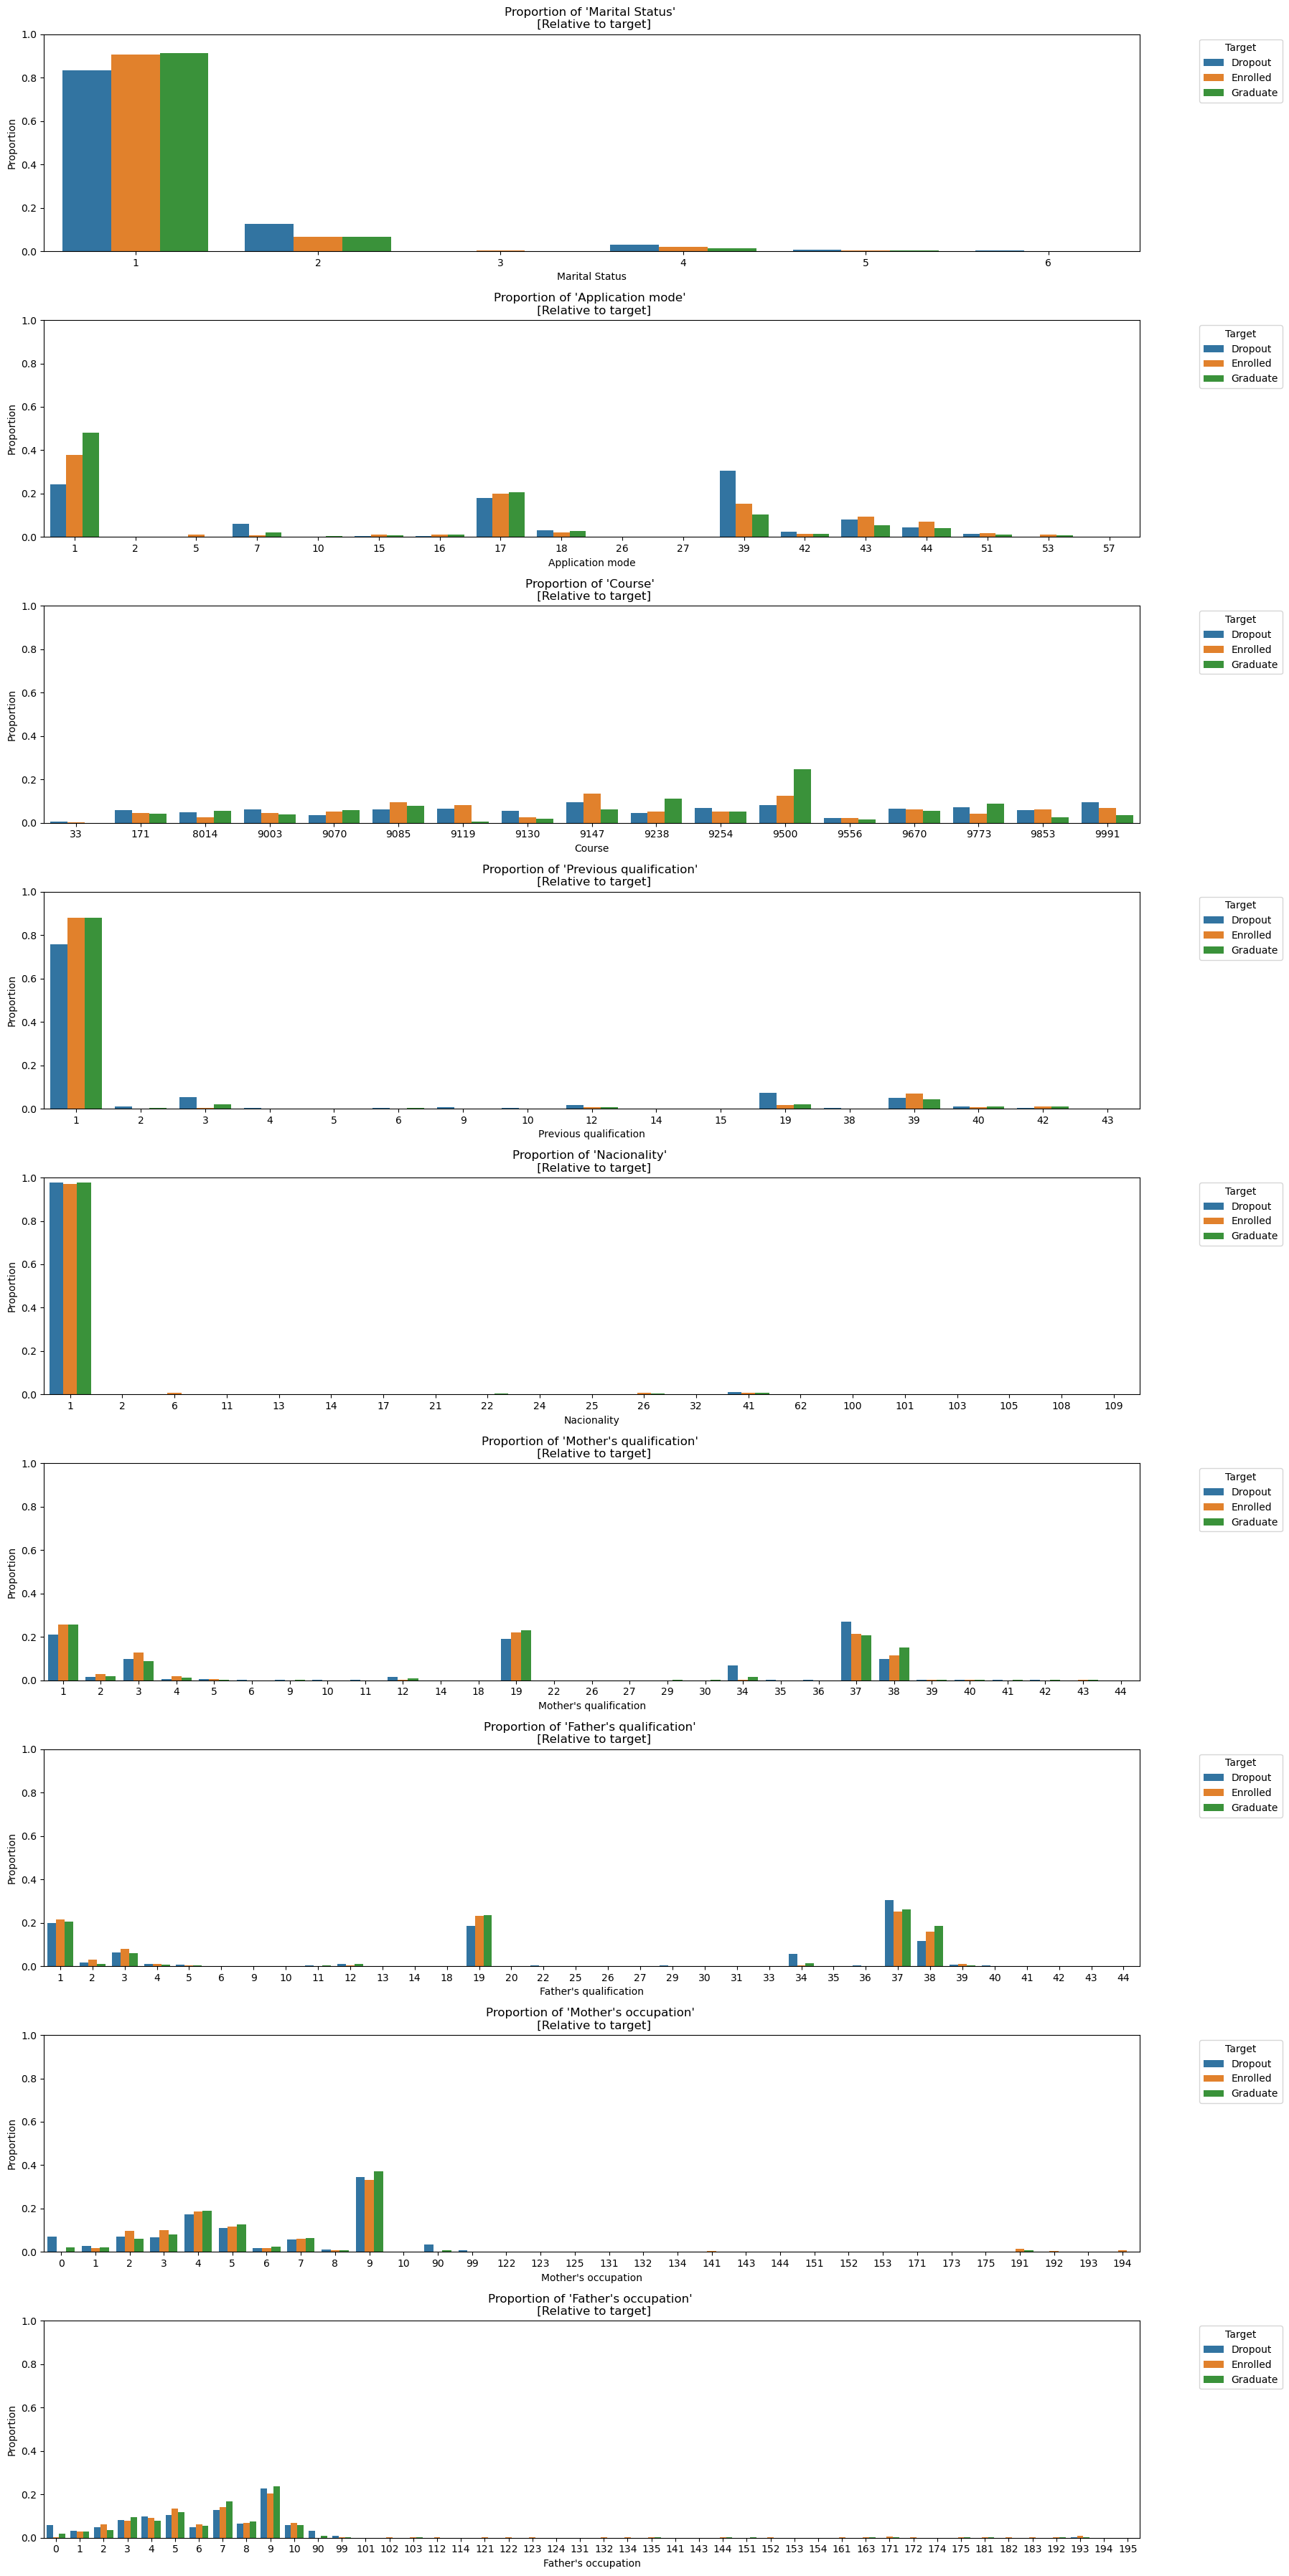

In [4]:
# Segregate the data base on its type
cat = [
    "Marital Status", 
    "Application mode", 
    "Course",
    "Previous qualification", 
    "Nacionality", 
    "Mother's qualification", 
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]

bin = [
    "Daytime/evening attendance",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International"
]

ord = [
    "Application order"
]

df_cat = df[cat + ['Target']]
df_bin = df[bin + ['Target']]
df_num = df.drop(columns=cat + bin)

# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(9, 1, figsize=(18, 36))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_cat[:-1]):
    # Group by 'Target' and the current feature to get counts
    grouped = df.groupby(['Target', col]).size().reset_index(name="count")
    
    # Calculate total counts for each 'Target'
    Target_totals = df.groupby('Target').size().reset_index(name="total")
    
    # Merge totals into the grouped DataFrame
    merged = pd.merge(grouped, Target_totals, on='Target')
    
    # Compute proportion relative to the total count of each Target
    merged["prop"] = merged["count"] / merged["total"]
    
    # Create a bar plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and bars are colored by 'Target'
    sns.barplot(y="prop", x=col, hue="Target", data=merged, ax=ax)
    ax.set_title(f"Proportion of '{col}' \n [Relative to target]")
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1)
    ax.legend(title="Target", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Binary

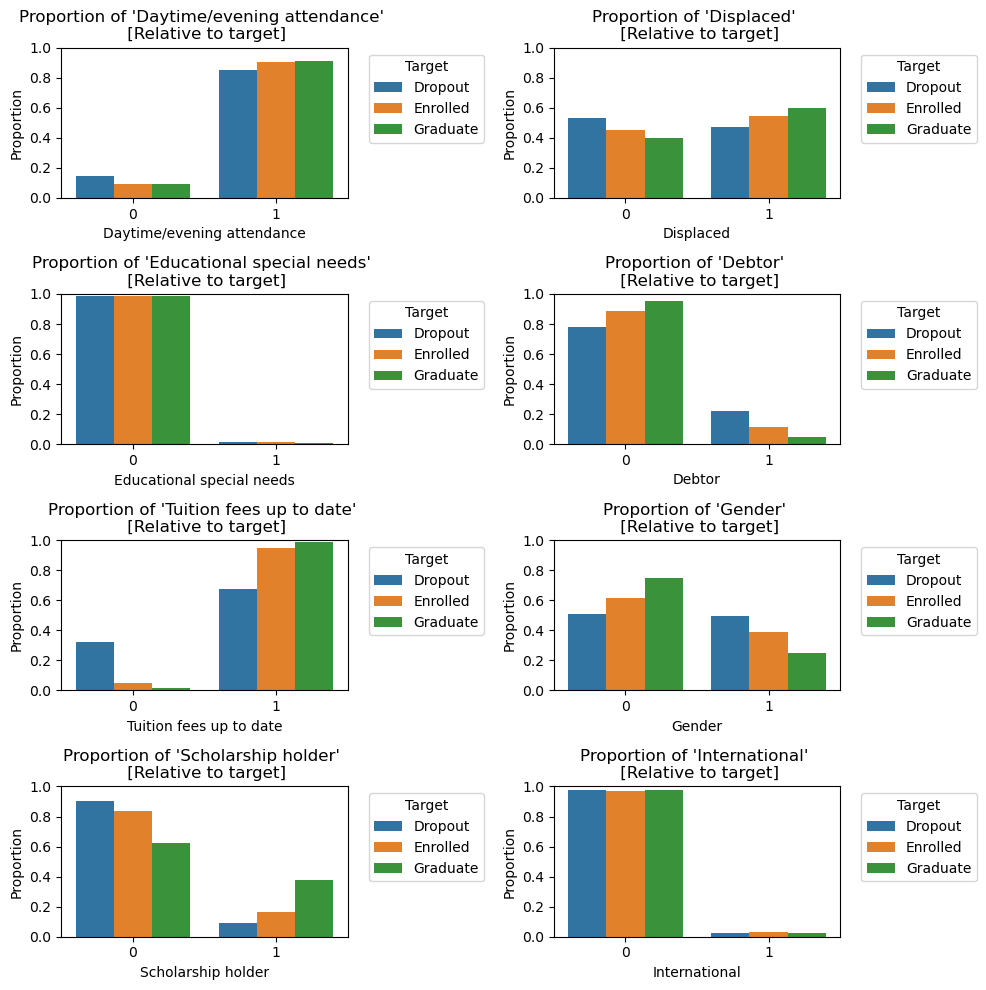

In [5]:
# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_bin[:-1]):
    # Group by 'Target' and the current feature to get counts
    grouped = df.groupby(['Target', col]).size().reset_index(name="count")
    
    # Calculate total counts for each 'Target'
    Target_totals = df.groupby('Target').size().reset_index(name="total")
    
    # Merge totals into the grouped DataFrame
    merged = pd.merge(grouped, Target_totals, on='Target')
    
    # Compute proportion relative to the total count of each Target
    merged["prop"] = merged["count"] / merged["total"]
    
    # Create a bar plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and bars are colored by 'Target'
    sns.barplot(y="prop", x=col, hue="Target", data=merged, ax=ax)
    ax.set_title(f"Proportion of '{col}' \n [Relative to target]")
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1)
    ax.legend(title="Target", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Continuous variables

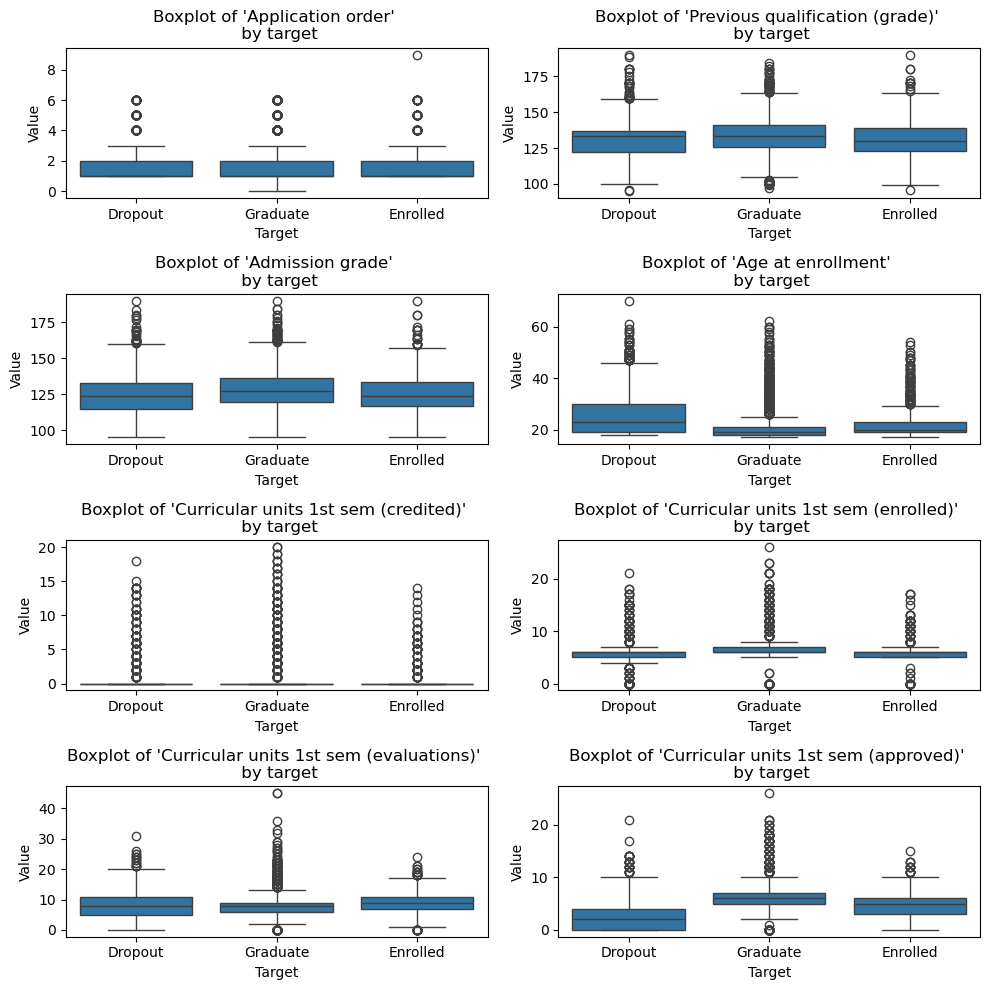

In [6]:
# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_num.columns[:-1]):

    # Create a box plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and box are colored by 'Target'
    sns.boxplot(x='Target', y=col, data=df_num, ax=ax)
    ax.set_title(f"Boxplot of '{col}' \n by target")
    ax.set_ylabel("Value")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

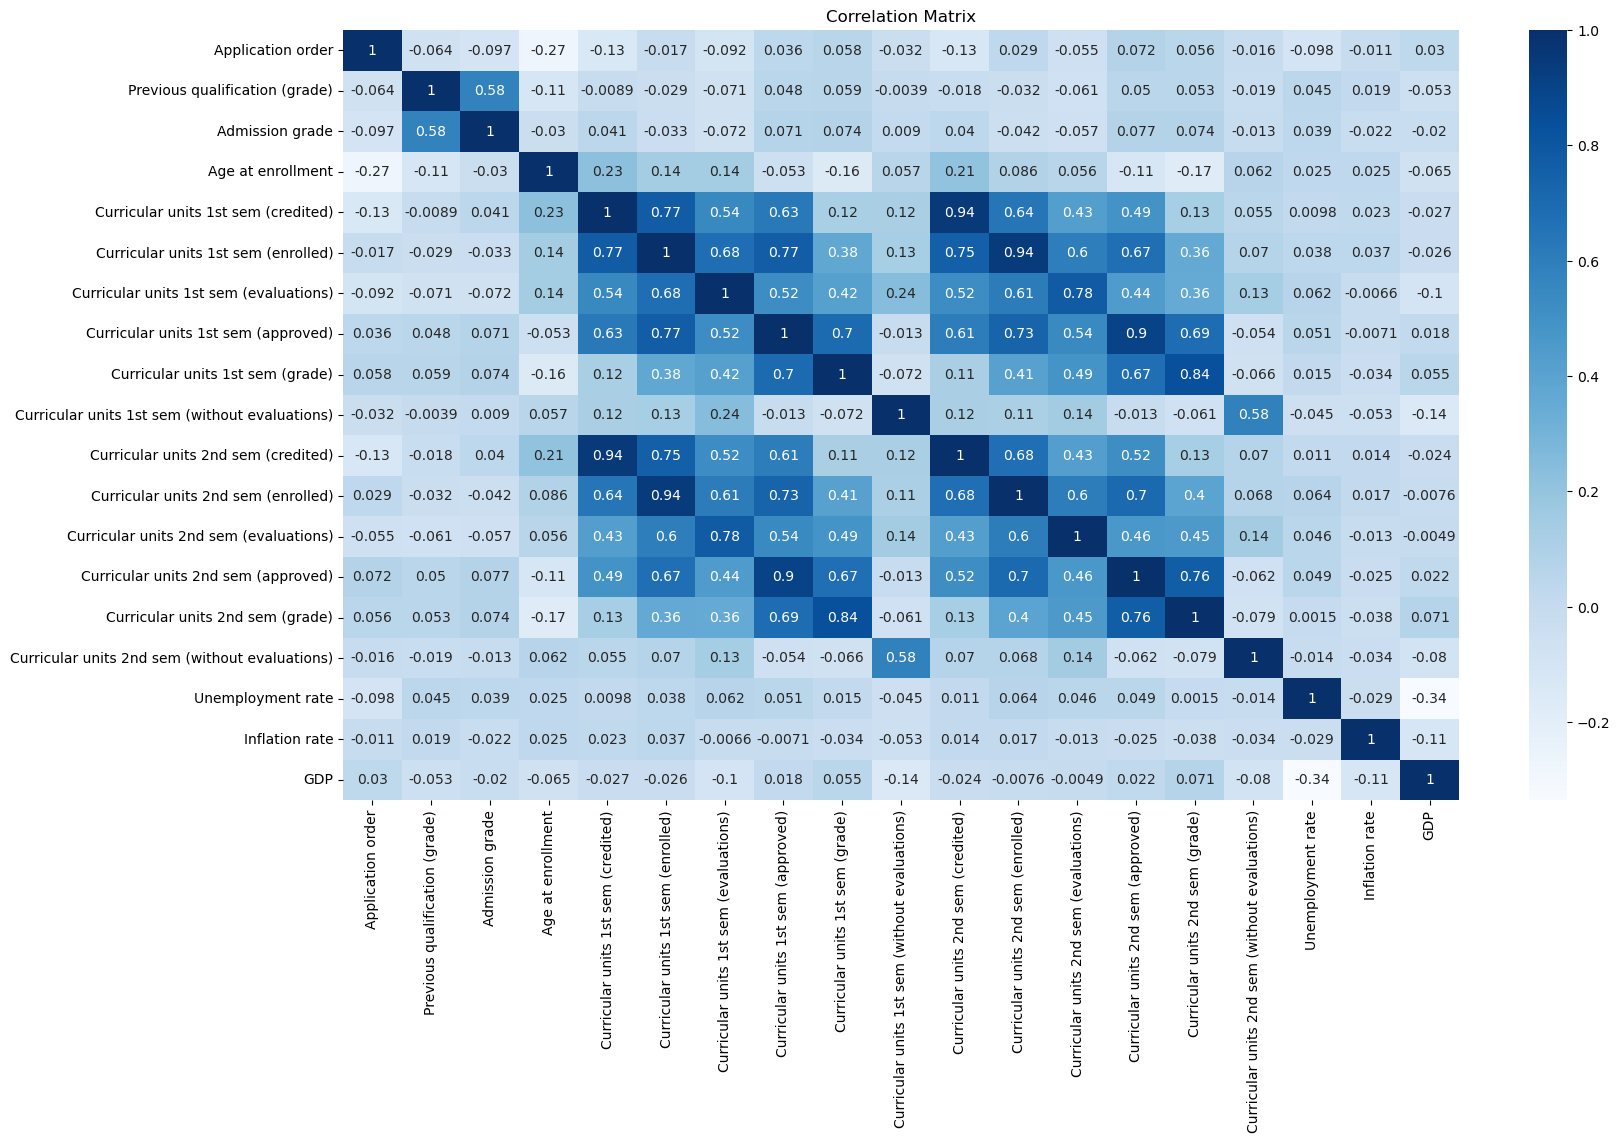

In [7]:
#Correlation matrix
plt.figure(figsize=(18, 10))
corr_matrix = df_num.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

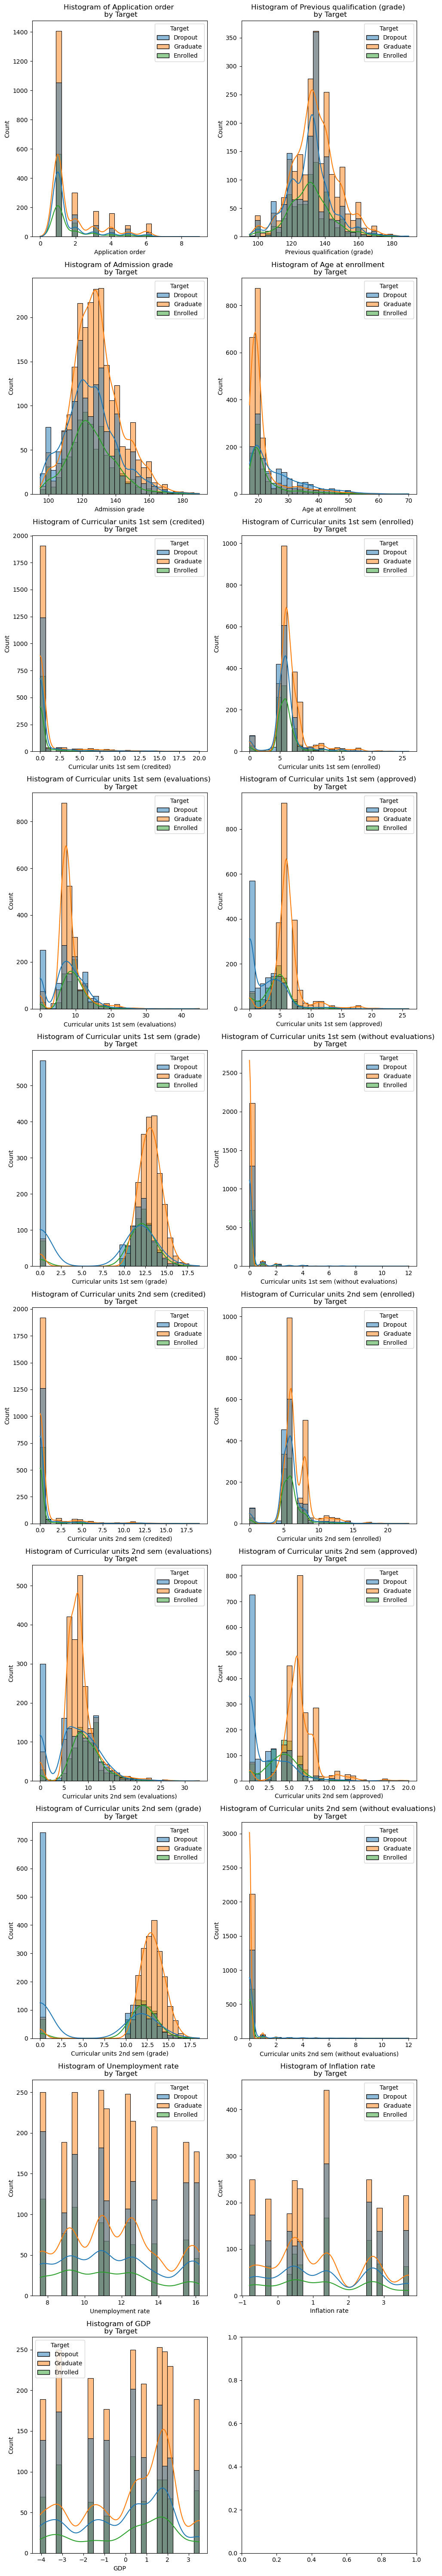

In [8]:
# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(10, 2, figsize=(10, 60))
axes = axes.flatten()

#Correlation matrix
for ax, col in zip(axes, df_num.columns[:-1]):
    sns.histplot(data=df_num, x=col, hue='Target', kde=True, bins=30, ax=ax)
    ax.set_title(f'Histogram of {col} \n by Target')
    ax.set_ylabel("Count")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Preprocessing

## Hold out examples

Balance split data stratified by the labels with 70% allocated to training, 15% for validation, and 15% for testing.

In [9]:
#Extract features and labels
x, y = df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy()

#Create training, validation, and test set
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.3, random_state=0,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0,stratify=y_2)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3096, 36)
(664, 36)
(664, 36)


## Power set generator

To generate all possible combinations of features.

In [10]:
#Power set generator
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

## Encoder

To implement OneHotEcoder during modeling.

In [11]:
encoder = OneHotEncoder()

# Train models

Combinations of model features and label treatments were implemented to determine the best model. Best result from each run is recorded and will be compared later.

## Logistic regregression

### One vs One

In [ ]:
# Search over different specification values
max_acc = 0
best_mdl = 0
spec = 0
tr_acc = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  
  cat_tr = np.intersect1d(cat, var)
  X_train_md = X_train[:, var]
  X_val_md = X_val[:, var]
  
  if len(cat_tr) > 0:
    # Encode the categorical variables
    X_train_md_encoded = encoder.fit_transform(X_train_md[:, cat_tr])
    X_val_md_encoded = encoder.transform(X_val_md[:, cat_tr])
  else:
    X_train_md_encoded = X_train_md
    X_val_md_encoded = X_val_md
  
  mdl = OneVsOneClassifier(LogisticRegression(solver='newton-cg', random_state=0, penalty=None)).fit(X_train_md_encoded, y_train)
  train_acc = mdl.score(X_train_md_encoded, y_train)
  val_acc = mdl.score(X_val_md_encoded, y_val)
  print(f"Specification: {var}")
  print(f"\tTraining accuracy: {train_acc}")
  print(f"\tValidation accuracy: {val_acc}")
    
  if val_acc > max_acc:
    max_acc = val_acc
    tr_acc = train_acc
    best_mdl = mdl
    spec = var

In [316]:
# Fit the encoder with the selected features
encoder.fit(X_train[:, spec])

# Encode the categorical variables for the validation set
X_val_encoded = encoder.transform(X_val[:, spec])

# Display the best specification and its validation accuracy
print(f"Best specification: {spec}")
print(f"Training accuracy: {tr_acc}")
print(f"Validation accuracy: {max_acc}")
print('Confusion Matrix')
print(confusion_matrix(y_val, best_mdl.predict(X_val_encoded)))

# Store the best model
ovo_log_reg = best_mdl
ovo_log_spec = spec

Best specification: (0, 1, 3, 4, 5)
Training accuracy: 0.9421009098428453
Validation accuracy: 0.9382239382239382
Confusion Matrix
[[ 48   0   8   1]
 [  0  10   0   1]
 [  5   0 176   0]
 [  0   1   0   9]]


### One vs Rest

In [317]:
max_acc = 0
best_mdl = 0
spec = 0
tr_acc = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  
  X_train_md = X_train[:, var]
  X_val_md = X_val[:, var]
  
  # Encode the categorical variables
  X_train_md_encoded = encoder.fit_transform(X_train_md)
  X_val_md_encoded = encoder.transform(X_val_md)
  
  mdl = OneVsRestClassifier(LogisticRegression(solver='newton-cg', random_state=0, penalty=None)).fit(X_train_md_encoded, y_train)
  train_acc = mdl.score(X_train_md_encoded, y_train)
  val_acc = mdl.score(X_val_md_encoded, y_val)
  print(f"Specification: {var}")
  print(f"\tTraining accuracy: {train_acc}")
  print(f"\tValidation accuracy: {val_acc}")
    
  if val_acc > max_acc:
    max_acc = val_acc
    tr_acc = train_acc
    best_mdl = mdl
    spec = var

Specification: (0,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (1,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (2,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (3,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (4,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (5,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 1)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 2)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 3)
	Training accuracy: 0.7047146401985112
	Validation accuracy: 0.6795366795366795
Specification: (0, 4)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.698841698

In [318]:
# Fit the encoder with the selected features
encoder.fit(X_train[:, spec])

# Encode the categorical variables for the validation set
X_val_encoded = encoder.transform(X_val[:, spec])

# Display the best specification and its validation accuracy
print(f"Best specification: {spec}")
print(f"Training accuracy: {tr_acc}")
print(f"Validation accuracy: {max_acc}")
print('Confusion Matrix')
print(confusion_matrix(y_val, best_mdl.predict(X_val_encoded)))

# Store the best model
ovr_log_reg = best_mdl
ovr_log_spec = spec

Best specification: (0, 1, 3, 4, 5)
Training accuracy: 0.9114971050454922
Validation accuracy: 0.9111969111969112
Confusion Matrix
[[ 47   1   8   1]
 [  7   3   0   1]
 [  4   0 177   0]
 [  1   0   0   9]]


### Output codes

In [319]:
max_acc = 0
best_mdl = 0
spec = 0
tr_acc = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  
  X_train_md = X_train[:, var]
  X_val_md = X_val[:, var]
  
  # Encode the categorical variables
  X_train_md_encoded = encoder.fit_transform(X_train_md)
  X_val_md_encoded = encoder.transform(X_val_md)
  
  mdl = OutputCodeClassifier(LogisticRegression(solver='newton-cg', random_state=0, penalty=None)).fit(X_train_md_encoded, y_train)
  train_acc = mdl.score(X_train_md_encoded, y_train)
  val_acc = mdl.score(X_val_md_encoded, y_val)
  print(f"Specification: {var}")
  print(f"\tTraining accuracy: {train_acc}")
  print(f"\tValidation accuracy: {val_acc}")
    
  if val_acc > max_acc:
    max_acc = val_acc
    tr_acc = train_acc
    best_mdl = mdl
    spec = var

Specification: (0,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (1,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (2,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (3,)
	Training accuracy: 0.22249793217535152
	Validation accuracy: 0.22007722007722008
Specification: (4,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (5,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 1)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 2)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 3)
	Training accuracy: 0.6815550041356493
	Validation accuracy: 0.6872586872586872
Specification: (0, 4)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416

In [320]:
# Fit the encoder with the selected features
encoder.fit(X_train[:, spec])

# Encode the categorical variables for the validation set
X_val_encoded = encoder.transform(X_val[:, spec])

# Display the best specification and its validation accuracy
print(f"Best specification: {spec}")
print(f"Training accuracy: {tr_acc}")
print(f"Validation accuracy: {max_acc}")
print('Confusion Matrix')
print(confusion_matrix(y_val, best_mdl.predict(X_val_encoded)))

# Store the best model
oc_log_reg = best_mdl
oc_log_spec = spec

Best specification: (0, 1, 3, 4, 5)
Training accuracy: 0.9040529363110008
Validation accuracy: 0.9073359073359073
Confusion Matrix
[[ 48   1   8   0]
 [  0  11   0   0]
 [  5   0 176   0]
 [  0  10   0   0]]


## Support Vector Machines : RBF kernel

### One vs One

In [321]:
max_acc = 0
best_mdl = 0
spec = 0
tr_acc = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  
  X_train_md = X_train[:, var]
  X_val_md = X_val[:, var]
  
  # Encode the categorical variables
  X_train_md_encoded = encoder.fit_transform(X_train_md)
  X_val_md_encoded = encoder.transform(X_val_md)
  
  mdl = OneVsOneClassifier(SVC(kernel='rbf')).fit(X_train_md_encoded, y_train)
  train_acc = mdl.score(X_train_md_encoded, y_train)
  val_acc = mdl.score(X_val_md_encoded, y_val)
  print(f"Specification: {var}")
  print(f"\tTraining accuracy: {train_acc}")
  print(f"\tValidation accuracy: {val_acc}")
    
  if val_acc > max_acc:
    max_acc = val_acc
    tr_acc = train_acc
    best_mdl = mdl
    spec = var

Specification: (0,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (1,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (2,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (3,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (4,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (5,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 1)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 2)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 3)
	Training accuracy: 0.7047146401985112
	Validation accuracy: 0.6795366795366795
Specification: (0, 4)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.698841698

In [322]:
# Fit the encoder with the selected features
encoder.fit(X_train[:, spec])

# Encode the categorical variables for the validation set
X_val_encoded = encoder.transform(X_val[:, spec])

# Display the best specification and its validation accuracy
print(f"Best specification: {spec}")
print(f"Training accuracy: {tr_acc}")
print(f"Validation accuracy: {max_acc}")
print('Confusion Matrix')
print(confusion_matrix(y_val, best_mdl.predict(X_val_encoded)))

# Store the best model
ovo_svm_rbf = best_mdl
ovo_svm_rbf_spec = spec

Best specification: (0, 1, 3, 4, 5)
Training accuracy: 0.9644334160463193
Validation accuracy: 0.9806949806949807
Confusion Matrix
[[ 55   0   1   1]
 [  0  10   0   1]
 [  2   0 179   0]
 [  0   0   0  10]]


### One vs Rest

In [323]:
max_acc = 0
best_mdl = 0
spec = 0
tr_acc = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  
  X_train_md = X_train[:, var]
  X_val_md = X_val[:, var]
  
  # Encode the categorical variables
  X_train_md_encoded = encoder.fit_transform(X_train_md)
  X_val_md_encoded = encoder.transform(X_val_md)
  
  mdl = OneVsRestClassifier(SVC(kernel='rbf')).fit(X_train_md_encoded, y_train)
  train_acc = mdl.score(X_train_md_encoded, y_train)
  val_acc = mdl.score(X_val_md_encoded, y_val)
  print(f"Specification: {var}")
  print(f"\tTraining accuracy: {train_acc}")
  print(f"\tValidation accuracy: {val_acc}")
    
  if val_acc > max_acc:
    max_acc = val_acc
    tr_acc = train_acc
    best_mdl = mdl
    spec = var

Specification: (0,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (1,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (2,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (3,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (4,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (5,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 1)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 2)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 3)
	Training accuracy: 0.6898263027295285
	Validation accuracy: 0.722007722007722
Specification: (0, 4)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988

In [324]:
# Fit the encoder with the selected features
encoder.fit(X_train[:, spec])

# Encode the categorical variables for the validation set
X_val_encoded = encoder.transform(X_val[:, spec])

# Display the best specification and its validation accuracy
print(f"Best specification: {spec}")
print(f"Training accuracy: {tr_acc}")
print(f"Validation accuracy: {max_acc}")
print('Confusion Matrix')
print(confusion_matrix(y_val, best_mdl.predict(X_val_encoded)))

# Store the best model
ovr_svm_rbf = best_mdl
ovr_svm_rbf_spec = spec

Best specification: (0, 1, 3, 4, 5)
Training accuracy: 0.9627791563275434
Validation accuracy: 0.972972972972973
Confusion Matrix
[[ 54   0   2   1]
 [  0  10   0   1]
 [  2   0 179   0]
 [  1   0   0   9]]


### Output codes

In [325]:
max_acc = 0
best_mdl = 0
spec = 0
tr_acc = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  
  X_train_md = X_train[:, var]
  X_val_md = X_val[:, var]
  
  # Encode the categorical variables
  X_train_md_encoded = encoder.fit_transform(X_train_md)
  X_val_md_encoded = encoder.transform(X_val_md)
  
  mdl = OutputCodeClassifier(SVC(kernel='rbf')).fit(X_train_md_encoded, y_train)
  train_acc = mdl.score(X_train_md_encoded, y_train)
  val_acc = mdl.score(X_val_md_encoded, y_val)
  print(f"Specification: {var}")
  print(f"\tTraining accuracy: {train_acc}")
  print(f"\tValidation accuracy: {val_acc}")
    
  if val_acc > max_acc:
    max_acc = val_acc
    tr_acc = train_acc
    best_mdl = mdl
    spec = var

Specification: (0,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (1,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (2,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (3,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (4,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (5,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 1)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 2)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 3)
	Training accuracy: 0.6782464846980976
	Validation accuracy: 0.6563706563706564
Specification: (0, 4)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.698841698

In [326]:
# Fit the encoder with the selected features
encoder.fit(X_train[:, spec])

# Encode the categorical variables for the validation set
X_val_encoded = encoder.transform(X_val[:, spec])

# Display the best specification and its validation accuracy
print(f"Best specification: {spec}")
print(f"Training accuracy: {tr_acc}")
print(f"Validation accuracy: {max_acc}")
print('Confusion Matrix')
print(confusion_matrix(y_val, best_mdl.predict(X_val_encoded)))

# Store the best model
oc_svm_rbf = best_mdl
oc_svm_rbf_spec = spec

Best specification: (0, 1, 3, 4, 5)
Training accuracy: 0.9429280397022333
Validation accuracy: 0.9536679536679536
Confusion Matrix
[[ 53   2   1   1]
 [  5   5   0   1]
 [  2   0 179   0]
 [  0   0   0  10]]


## Support Vector Machines : Linear kernel

### One vs One

In [327]:
max_acc = 0
best_mdl = 0
spec = 0
tr_acc = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  
  X_train_md = X_train[:, var]
  X_val_md = X_val[:, var]
  
  # Encode the categorical variables
  X_train_md_encoded = encoder.fit_transform(X_train_md)
  X_val_md_encoded = encoder.transform(X_val_md)
  
  mdl = OneVsOneClassifier(SVC(kernel='linear')).fit(X_train_md_encoded, y_train)
  train_acc = mdl.score(X_train_md_encoded, y_train)
  val_acc = mdl.score(X_val_md_encoded, y_val)
  print(f"Specification: {var}")
  print(f"\tTraining accuracy: {train_acc}")
  print(f"\tValidation accuracy: {val_acc}")
    
  if val_acc > max_acc:
    max_acc = val_acc
    tr_acc = train_acc
    best_mdl = mdl
    spec = var

Specification: (0,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (1,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (2,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (3,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (4,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (5,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 1)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 2)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 3)
	Training accuracy: 0.7030603804797353
	Validation accuracy: 0.6795366795366795
Specification: (0, 4)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.698841698

In [328]:
# Fit the encoder with the selected features
encoder.fit(X_train[:, spec])

# Encode the categorical variables for the validation set
X_val_encoded = encoder.transform(X_val[:, spec])

# Display the best specification and its validation accuracy
print(f"Best specification: {spec}")
print(f"Training accuracy: {tr_acc}")
print(f"Validation accuracy: {max_acc}")
print('Confusion Matrix')
print(confusion_matrix(y_val, best_mdl.predict(X_val_encoded)))

# Store the best model
ovo_svm_lin = best_mdl
ovo_svm_lin_spec = spec

Best specification: (0, 1, 3, 4, 5)
Training accuracy: 0.9396195202646815
Validation accuracy: 0.9459459459459459
Confusion Matrix
[[ 48   0   8   1]
 [  0  10   0   1]
 [  4   0 177   0]
 [  0   0   0  10]]


### One vs Rest

In [329]:
max_acc = 0
best_mdl = 0
spec = 0
tr_acc = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  
  X_train_md = X_train[:, var]
  X_val_md = X_val[:, var]
  
  # Encode the categorical variables
  X_train_md_encoded = encoder.fit_transform(X_train_md)
  X_val_md_encoded = encoder.transform(X_val_md)
  
  mdl = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train_md_encoded, y_train)
  train_acc = mdl.score(X_train_md_encoded, y_train)
  val_acc = mdl.score(X_val_md_encoded, y_val)
  print(f"Specification: {var}")
  print(f"\tTraining accuracy: {train_acc}")
  print(f"\tValidation accuracy: {val_acc}")
    
  if val_acc > max_acc:
    max_acc = val_acc
    tr_acc = train_acc
    best_mdl = mdl
    spec = var

Specification: (0,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (1,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (2,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (3,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (4,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (5,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 1)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 2)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 3)
	Training accuracy: 0.6501240694789082
	Validation accuracy: 0.6216216216216216
Specification: (0, 4)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.698841698

In [330]:
# Fit the encoder with the selected features
encoder.fit(X_train[:, spec])

# Encode the categorical variables for the validation set
X_val_encoded = encoder.transform(X_val[:, spec])

# Display the best specification and its validation accuracy
print(f"Best specification: {spec}")
print(f"Training accuracy: {tr_acc}")
print(f"Validation accuracy: {max_acc}")
print('Confusion Matrix')
print(confusion_matrix(y_val, best_mdl.predict(X_val_encoded)))

# Store the best model
ovr_svm_lin = best_mdl
ovr_svm_lin_spec = spec

Best specification: (0, 1, 3, 4, 5)
Training accuracy: 0.890818858560794
Validation accuracy: 0.888030888030888
Confusion Matrix
[[ 45   0  12   0]
 [  7   3   0   1]
 [  8   0 173   0]
 [  1   0   0   9]]


### Output codes

In [331]:
max_acc = 0
best_mdl = 0
spec = 0
tr_acc = 0

for var in powerset(range(X_train.shape[1])):
  if len(var) == 0: # Skip empty set
    continue
  
  X_train_md = X_train[:, var]
  X_val_md = X_val[:, var]
  
  # Encode the categorical variables
  X_train_md_encoded = encoder.fit_transform(X_train_md)
  X_val_md_encoded = encoder.transform(X_val_md)
  
  mdl = OutputCodeClassifier(SVC(kernel='linear')).fit(X_train_md_encoded, y_train)
  train_acc = mdl.score(X_train_md_encoded, y_train)
  val_acc = mdl.score(X_val_md_encoded, y_val)
  print(f"Specification: {var}")
  print(f"\tTraining accuracy: {train_acc}")
  print(f"\tValidation accuracy: {val_acc}")
    
  if val_acc > max_acc:
    max_acc = val_acc
    tr_acc = train_acc
    best_mdl = mdl
    spec = var

Specification: (0,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (1,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (2,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (3,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (4,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (5,)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 1)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 2)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.6988416988416989
Specification: (0, 3)
	Training accuracy: 0.6038047973531845
	Validation accuracy: 0.6023166023166023
Specification: (0, 4)
	Training accuracy: 0.7005789909015715
	Validation accuracy: 0.698841698

In [332]:
# Fit the encoder with the selected features
encoder.fit(X_train[:, spec])

# Encode the categorical variables for the validation set
X_val_encoded = encoder.transform(X_val[:, spec])

# Display the best specification and its validation accuracy
print(f"Best specification: {spec}")
print(f"Training accuracy: {tr_acc}")
print(f"Validation accuracy: {max_acc}")
print('Confusion Matrix')
print(confusion_matrix(y_val, best_mdl.predict(X_val_encoded)))

# Store the best model
oc_svm_lin = best_mdl
oc_svm_lin_spec = spec

Best specification: (0, 1, 2, 3, 4, 5)
Training accuracy: 0.8817204301075269
Validation accuracy: 0.8648648648648649
Confusion Matrix
[[ 44   0  13   0]
 [  7   0   0   4]
 [  8   0 173   0]
 [  3   0   0   7]]


# Test models

From the selected models with the best scores above, each will undergone testing. The model with the highest score will be the best model.

## Logistic Regression

In [333]:
# Model 1: OneVsOneClassifier with Logistic Regression

# Fit the encoder with the selected features
encoder.fit(X_test[:, ovo_log_spec])

# Encode the categorical variables for the test set
X_test_encoded = encoder.transform(X_test[:, ovo_log_spec])

# Calculate the score
print('Test accuracy:',ovo_log_reg.score(X_test_encoded, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, ovo_log_reg.predict(X_test_encoded)))

Test accuracy: 0.8846153846153846
Confusion Matrix
[[ 42   0  16   0]
 [  1   7   0   2]
 [ 11   0 171   0]
 [  0   0   0  10]]


In [334]:
# Model 2: OneVsRest with Logistic Regression

# Fit the encoder with the selected features
encoder.fit(X_test[:, ovr_log_spec])

# Encode the categorical variables for the test set
X_test_encoded = encoder.transform(X_test[:, ovr_log_spec])

# Calculate the score
print('Test accuracy:',ovr_log_reg.score(X_test_encoded, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, ovr_log_reg.predict(X_test_encoded)))

Test accuracy: 0.823076923076923
Confusion Matrix
[[ 35   3  20   0]
 [  6   2   0   2]
 [ 10   0 172   0]
 [  5   0   0   5]]


In [335]:
# Model 3: OutputCodes with Logistic Regression

# Fit the encoder with the selected features
encoder.fit(X_test[:, oc_log_spec])

# Encode the categorical variables for the test set
X_test_encoded = encoder.transform(X_test[:, oc_log_spec])

# Calculate the score
print('Test accuracy:',oc_log_reg.score(X_test_encoded, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, oc_log_reg.predict(X_test_encoded)))

Test accuracy: 0.8461538461538461
Confusion Matrix
[[ 40   0  18   0]
 [  1   9   0   0]
 [ 11   0 171   0]
 [  0  10   0   0]]


## Support Vector Machines: RBF Kernel

In [336]:
# Model 4: OneVsOne with Support Vector Machines (RBF Kernel)

# Fit the encoder with the selected features
encoder.fit(X_test[:, ovo_svm_rbf_spec])

# Encode the categorical variables for the test set
X_test_encoded = encoder.transform(X_test[:, ovo_svm_rbf_spec])

# Calculate the score
print('Test accuracy:',ovo_svm_rbf.score(X_test_encoded, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, ovo_svm_rbf.predict(X_test_encoded)))

Test accuracy: 0.9230769230769231
Confusion Matrix
[[ 55   2   1   0]
 [  0   8   0   2]
 [ 15   0 167   0]
 [  0   0   0  10]]


In [337]:
# Model 5: OneVsRest with Support Vector Machines (RBF Kernel)

# Fit the encoder with the selected features
encoder.fit(X_test[:, ovr_svm_rbf_spec])

# Encode the categorical variables for the test set
X_test_encoded = encoder.transform(X_test[:, ovr_svm_rbf_spec])

# Calculate the score
print('Test accuracy:',ovr_svm_rbf.score(X_test_encoded, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, ovr_svm_rbf.predict(X_test_encoded)))

Test accuracy: 0.9153846153846154
Confusion Matrix
[[ 54   1   3   0]
 [  0   8   0   2]
 [ 15   0 167   0]
 [  1   0   0   9]]


In [338]:
# Model 6: OutputCode with Support Vector Machines (RBF Kernel)

# Fit the encoder with the selected features
encoder.fit(X_test[:, oc_svm_rbf_spec])

# Encode the categorical variables for the test set
X_test_encoded = encoder.transform(X_test[:, oc_svm_rbf_spec])

# Calculate the score
print('Test accuracy:',oc_svm_rbf.score(X_test_encoded, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, oc_svm_rbf.predict(X_test_encoded)))

Test accuracy: 0.8884615384615384
Confusion Matrix
[[ 53   4   1   0]
 [  7   1   0   2]
 [ 15   0 167   0]
 [  0   0   0  10]]


## Support Vector Machines: Linear Kernel

In [339]:
# Model 7: OneVsOne with Support Vector Machines (Linear Kernel)

# Fit the encoder with the selected features
encoder.fit(X_test[:, ovo_svm_lin_spec])

# Encode the categorical variables for the test set
X_test_encoded = encoder.transform(X_test[:, ovo_svm_lin_spec])

# Calculate the score
print('Test accuracy:',ovo_svm_lin.score(X_test_encoded, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, ovo_svm_lin.predict(X_test_encoded)))

Test accuracy: 0.8884615384615384
Confusion Matrix
[[ 44   0  14   0]
 [  1   7   0   2]
 [ 12   0 170   0]
 [  0   0   0  10]]


In [340]:
# Model 8: OneVsRest with Support Vector Machines (Linear Kernel)

# Fit the encoder with the selected features
encoder.fit(X_test[:, ovr_svm_lin_spec])

# Encode the categorical variables for the test set
X_test_encoded = encoder.transform(X_test[:, ovr_svm_lin_spec])

# Calculate the score
print('Test accuracy:',ovr_svm_lin.score(X_test_encoded, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, ovr_svm_lin.predict(X_test_encoded)))

Test accuracy: 0.8038461538461539
Confusion Matrix
[[ 34   1  23   0]
 [  7   1   0   2]
 [ 12   0 170   0]
 [  6   0   0   4]]


In [341]:
# Model 9: OutputCode with Support Vector Machines (Linear Kernel)

# Fit the encoder with the selected features
encoder.fit(X_test[:, oc_svm_lin_spec])

# Encode the categorical variables for the test set
X_test_encoded = encoder.transform(X_test[:, oc_svm_lin_spec])

# Calculate the score
print('Test accuracy:',oc_svm_lin.score(X_test_encoded, y_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, oc_svm_lin.predict(X_test_encoded)))

Test accuracy: 0.8307692307692308
Confusion Matrix
[[ 41   0  17   0]
 [  5   0   0   5]
 [  9   0 173   0]
 [  8   0   0   2]]


# Present best model

Base on the scores from the test examples, support vector machines using RBF kernel utilizing one versus one classifier on the label is the best. All features are used except for number of doors.

Specification: (0, 1, 3, 4, 5)
Training accuracy of Best Model: 0.9644334160463193
Validation accuracy of Best Model: 0.9806949806949807
Testing accuracy of Best Model: 0.9230769230769231


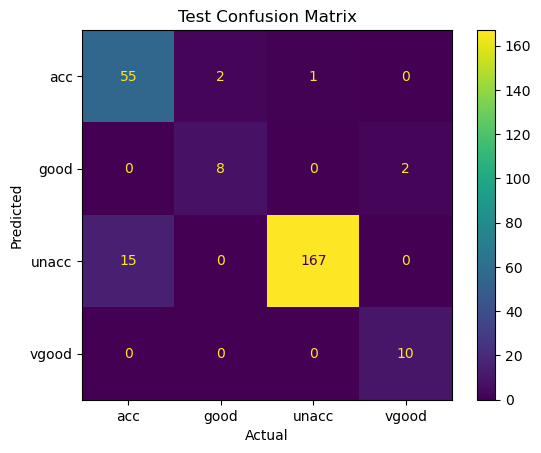

              precision    recall  f1-score   support

         acc       0.79      0.95      0.86        58
        good       0.80      0.80      0.80        10
       unacc       0.99      0.92      0.95       182
       vgood       0.83      1.00      0.91        10

    accuracy                           0.92       260
   macro avg       0.85      0.92      0.88       260
weighted avg       0.93      0.92      0.93       260



In [342]:
# Print results of the best model
print(f"Specification: {ovo_svm_rbf_spec}")

# Fit the encoder with the selected features
encoder.fit(X_train[:, ovo_svm_rbf_spec])

# Encode the categorical variables
X_test_md = encoder.transform(X_test[:, ovo_svm_rbf_spec])
X_train_md = encoder.transform(X_train[:, ovo_svm_rbf_spec])
X_val_md = encoder.transform(X_val[:, ovo_svm_rbf_spec])

train_acc = ovo_svm_rbf.score(X_train_md, y_train)
print(f"Training accuracy of Best Model: {train_acc}")
val_acc = ovo_svm_rbf.score(X_val_md, y_val)
print(f"Validation accuracy of Best Model: {val_acc}")
test_acc = ovo_svm_rbf.score(X_test_md, y_test)
print(f"Testing accuracy of Best Model: {test_acc}")

y_train_pred = ovo_svm_rbf.predict(X_train_md)
y_val_pred = ovo_svm_rbf.predict(X_val_md)
y_test_pred = ovo_svm_rbf.predict(X_test_md)

cfm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["acc", "good", "unacc", "vgood"])
cm_display.plot()
plt.title('Test Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
print(classification_report(y_test, y_test_pred, target_names=["acc", "good", "unacc", "vgood"]))